In [1]:
from langchain.document_loaders import UnstructuredPDFLoader, OnlinePDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

## Load book data

In [2]:
loader = UnstructuredPDFLoader("./book_ML_color.pdf")

In [3]:
data = loader.load()

detectron2 is not installed. Cannot use the hi_res partitioning strategy. Falling back to partitioning with the fast strategy.


In [4]:
print (f'You have {len(data)} document(s) in your data')
print (f'There are {len(data[0].page_content)} characters in your document')

You have 1 document(s) in your data
There are 762239 characters in your document


## Chunk data into smaller documents

In [5]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
texts = text_splitter.split_documents(data)

In [6]:
print (f'Now you have {len(texts)} documents')

Now you have 879 documents


## Create embeddings of your documents to get ready for semantic search

In [7]:
from langchain.vectorstores import Chroma, Pinecone
from langchain.embeddings.openai import OpenAIEmbeddings
import pinecone

d:\Work-Programe\Python\lib\site-packages\pinecone\index.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [8]:
import os
from dotenv import load_dotenv
load_dotenv('.env')

OPENAI_API_KEY = os.environ['OPENAI_API_KEY']
PINECONE_API_KEY = os.environ['PINECONE_API_KEY']
PINECONE_API_ENV = os.environ['PINECONE_API_ENV']


In [9]:
embeddings = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)

In [10]:
# initialize pinecone
pinecone.init(
    api_key=PINECONE_API_KEY,  # find at app.pinecone.io
    environment=PINECONE_API_ENV  # next to api key in console
)
index_name = "index1" # put in the name of your pinecone index here

In [18]:
docsearch = Pinecone.from_texts([t.page_content for t in texts], embeddings, index_name=index_name)

In [19]:
query = "Thế nào là Machine Learning?"
docs = docsearch.similarity_search(query, include_metadata=True)
docs

[Document(page_content='Học máy (machine learning–ML) là một tập con của trí tuệ nhân tạo. Nó là một lĩnh vực nhỏ trong khoa học máy tính, có khả năng tự học hỏi dựa trên dữ liệu được đưa vào mà không cần phải được lập trình cụ thể (Machine Learning is the subfiled of computer science, that “gives computers the ability to learn without being explicitly programmed”–Wikipedia).\n\nNhững năm gần đây, sự phát triển của các hệ thống tính toán cùng với lượng dữ liệu khổng lồ được thu thập bởi các hãng công nghệ lớn đã giúp machine learning tiến thêm một bước dài. Một lĩnh vực mới được ra đời được gọi là học sâu (deep learning–DL). Deep learning đã giúp máy tính thực thi những việc tưởng chừng như không thể vào mười năm trước: phân loại cả ngàn vật thể khác nhau trong các bức ảnh, tự tạo chú thích cho ảnh, bắt chước giọng nói và chữ viết của con người, giao tiếp với con người, chuyển đổi ngôn ngữ, hay thậm chí cả sáng tác văn thơ hay âm nhạc1.\n\nMối quan hệ AI\n\n\n\nML\n\n\n\nDL', lookup_st

In [13]:
docs[0].page_content

'Học máy (machine learning–ML) là một tập con của trí tuệ nhân tạo. Nó là một lĩnh vực nhỏ trong khoa học máy tính, có khả năng tự học hỏi dựa trên dữ liệu được đưa vào mà không cần phải được lập trình cụ thể (Machine Learning is the subfiled of computer science, that “gives computers the ability to learn without being explicitly programmed”–Wikipedia).\n\nNhững năm gần đây, sự phát triển của các hệ thống tính toán cùng với lượng dữ liệu khổng lồ được thu thập bởi các hãng công nghệ lớn đã giúp machine learning tiến thêm một bước dài. Một lĩnh vực mới được ra đời được gọi là học sâu (deep learning–DL). Deep learning đã giúp máy tính thực thi những việc tưởng chừng như không thể vào mười năm trước: phân loại cả ngàn vật thể khác nhau trong các bức ảnh, tự tạo chú thích cho ảnh, bắt chước giọng nói và chữ viết của con người, giao tiếp với con người, chuyển đổi ngôn ngữ, hay thậm chí cả sáng tác văn thơ hay âm nhạc1.\n\nMối quan hệ AI\n\n\n\nML\n\n\n\nDL'

## Query those docs to get your answer back

In [14]:
from langchain.llms import OpenAI
from langchain.chains.question_answering import load_qa_chain

In [15]:
llm = OpenAI(temperature=0, openai_api_key=OPENAI_API_KEY, max_tokens=2048, model_name="gpt-3.5-turbo")
chain = load_qa_chain(llm, chain_type="stuff")

In [16]:
query = "Machine learning là gì?"
docs = docsearch.similarity_search(query, include_metadata=True)

In [17]:
chain.run(input_documents=docs, question=query)

'Machine learning là một tập con của trí tuệ nhân tạo, là một lĩnh vực nhỏ trong khoa học máy tính, có khả năng tự học hỏi dựa trên dữ liệu được đưa vào mà không cần phải được lập trình cụ thể.'

## Summary work flow

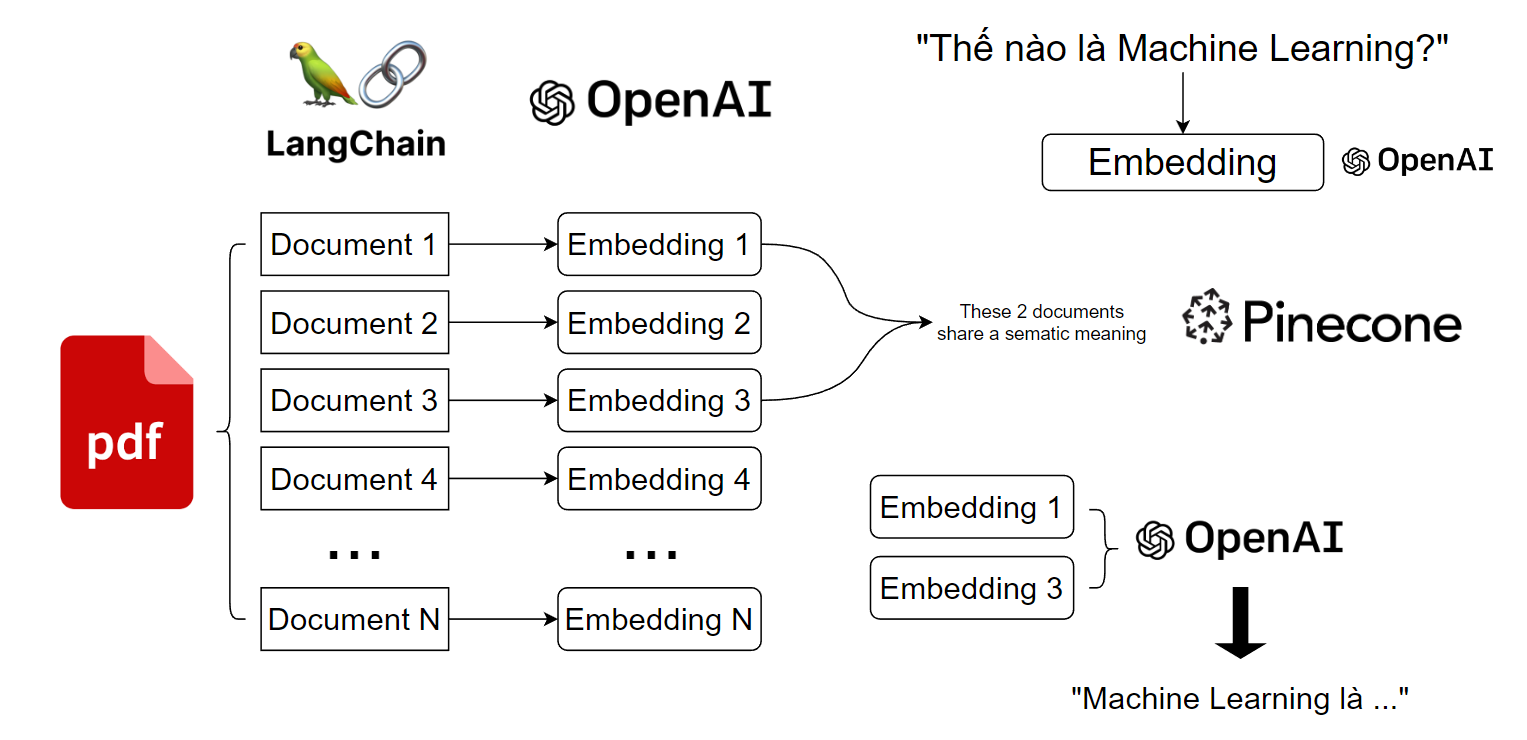